In [2]:
import pandas as pd
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [3]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
df = pd.read_csv('updated_pollution_dataset.csv')

X = df.drop(columns=["Air Quality"]) 
y = df["Air Quality"]
label_encoder = LabelEncoder()
y= label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
 

In [14]:
model = keras.models.Sequential()
model.add(Dense(units=9, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=8, activation='relu', name = 'lay_1'))
model.add(Dense(units=8, activation='relu', name = 'lay_2'))
model.add(Dense(units=8, activation='relu', name = 'lay_3'))
model.add(Dense(units=4, activation='softmax'))

In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=250, batch_size=32, validation_split=0.1)
loss, accuracy = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)

Epoch 1/250
113/113 [==============================] - 1s 6ms/step - loss: 6.0841 - accuracy: 0.3078 - val_loss: 1.4497 - val_accuracy: 0.4125
Epoch 2/250
113/113 [==============================] - 0s 2ms/step - loss: 1.3746 - accuracy: 0.4081 - val_loss: 1.3909 - val_accuracy: 0.3775
Epoch 3/250
113/113 [==============================] - 0s 2ms/step - loss: 1.3432 - accuracy: 0.4217 - val_loss: 1.3644 - val_accuracy: 0.3825
Epoch 4/250
113/113 [==============================] - 0s 2ms/step - loss: 1.3155 - accuracy: 0.4247 - val_loss: 1.3397 - val_accuracy: 0.3675
Epoch 5/250
113/113 [==============================] - 0s 2ms/step - loss: 1.2895 - accuracy: 0.4378 - val_loss: 1.3225 - val_accuracy: 0.3900
Epoch 6/250
113/113 [==============================] - 0s 2ms/step - loss: 1.2661 - accuracy: 0.4572 - val_loss: 1.2843 - val_accuracy: 0.4050
Epoch 7/250
113/113 [==============================] - 0s 2ms/step - loss: 1.2393 - accuracy: 0.4772 - val_loss: 1.2572 - val_accuracy: 0.4275

In [16]:
print(accuracy)

0.938


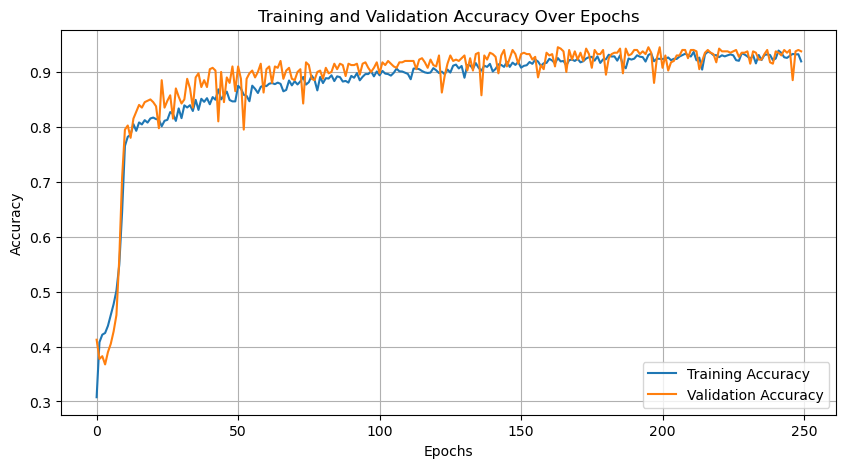

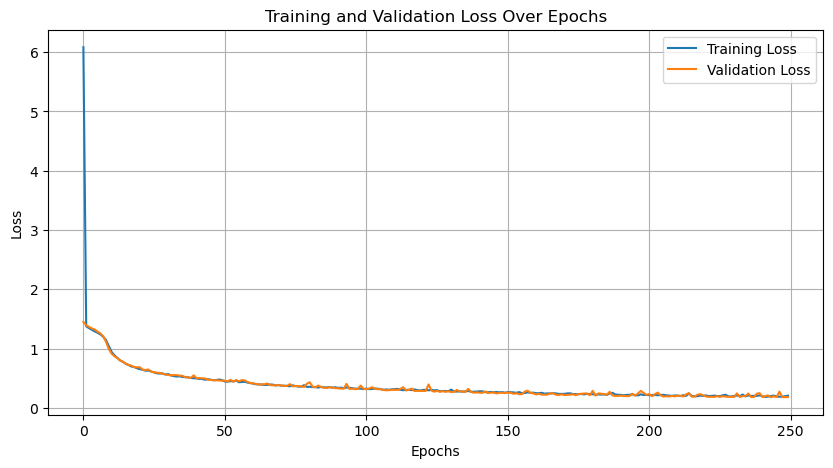

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
